# Explainability in Antepartum Hemorraghe 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

In [56]:
# Specify the file path
df = pd.read_excel(r"/kaggle/input/aph-dataset/4501_AMANHI_With_USG.xlsx")
df.head(3)


,WHOWID,ORIG_ID,PARTICIPANT_ID,PW_AGE,PW_EDUCATION,PREV_SB,PREV_MIS,PREV_PTB,PREV_MULTIP,PREV_CS,...,DBP4,UDIP_PROT4,DEL_DATE,GAGEBRTH,TYPEDELIV,age_death_b1,age_death_b2,age_death_b3,APH,MAT_WEIGHT
0,20-016580,16580,AMANHIT-20916,36,10.0,1,2,0,1,0,...,69.0,0.0,2014-10-31,271.0,Normally through the vagina,NaN,NaN,NaN,0.0,45.8
1,20-016683,16683,AMANHIT-22194,32,10.0,0,0,0,0,0,...,73.0,0.0,2015-01-06,274.0,Normally through the vagina,NaN,NaN,NaN,0.0,NaN
2,20-016685,16685,AMANHIT-22712,18,6.0,0,1,0,0,0,...,70.0,0.0,2015-01-31,290.0,Normally through the vagina,NaN,NaN,NaN,0.0,68.0


In [57]:
df = df.replace([-88, -77], np.nan)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   WHOWID          4501 non-null   object        
 1   ORIG_ID         4501 non-null   int64         
 2   PARTICIPANT_ID  4501 non-null   object        
 3   PW_AGE          4501 non-null   int64         
 4   PW_EDUCATION    4485 non-null   float64       
 5   PREV_SB         3700 non-null   float64       
 6   PREV_MIS        3700 non-null   float64       
 7   PREV_PTB        3505 non-null   float64       
 8   PREV_MULTIP     3700 non-null   float64       
 9   PREV_CS         3700 non-null   float64       
 10  WEALTH_INDEX    4501 non-null   object        
 11  SINGLE_TWIN     4386 non-null   float64       
 12  GRAVIDITY       4485 non-null   float64       
 13  PARITY          3700 non-null   float64       
 14  LABOUR_HTN      3960 non-null   float64       
 15  LABO

In [59]:
df.drop(['ORIG_ID','PARTICIPANT_ID','BIRTH_OUTCOME','BABY_SEX','BIRTH_WEIGHT','LABOUR_HTN','GAGEBRTH','BABY_ID1','BABY_ID2','BABY_ID3','WHOWID','BIRTH_OUTCOME2','BIRTH_WEIGHT2','BIRTH_OUTCOME3','BABY_SEX3','BIRTH_WEIGHT3','WEALTH_INDEX','DEL_DATE','age_death_b1','age_death_b2','age_death_b3','BABY_SEX2','TYPEDELIV','BIRTH_OUTCOME1','BABY_SEX1','BIRTH_WEIGHT1'], axis=1, inplace=True)

In [60]:
df_nonAPH = df[df["APH"] == 0]
df_APH = df[df["APH"] == 1]


In [61]:
import pandas as pd

# Columns to be imputed
numerical_columns = ['SBP1', 'DBP1', 'UDIP_PROT1', 'SBP2', 'DBP2', 'UDIP_PROT2', 
                     'SBP3', 'DBP3', 'UDIP_PROT3', 'SBP4', 'DBP4', 'UDIP_PROT4', 
                     'MAT_WEIGHT', 'GRAVIDITY', 'PARITY']

categorical_columns = ['PW_EDUCATION', 'LABOUR_24', 'SINGLE_TWIN', 'PREV_SB', 
                       'PREV_MIS', 'PREV_PTB', 'PREV_MULTIP', 'PREV_CS']

# Fill missing values in numerical columns using median
for col in numerical_columns:
    median_value_nonAPH = df_nonAPH[col].median()
    df_nonAPH[col].fillna(median_value_nonAPH, inplace=True)
    
    median_value_APH = df_APH[col].median()
    df_APH[col].fillna(median_value_APH, inplace=True)

# Fill missing values in categorical columns using mode
for col in categorical_columns:
    mode_value_nonAPH = df_nonAPH[col].mode()[0]  # Get the most frequent value
    df_nonAPH[col].fillna(mode_value_nonAPH, inplace=True)
    
    mode_value_APH = df_APH[col].mode()[0]  # Get the most frequent value
    df_APH[col].fillna(mode_value_APH, inplace=True)

# Check for remaining missing values
print("Missing values in df_nonAPH after imputation:")
print(df_nonAPH[numerical_columns + categorical_columns].isnull().sum())

print("\nMissing values in df_APH after imputation:")
print(df_APH[numerical_columns + categorical_columns].isnull().sum())

Missing values in df_nonAPH after imputation:
SBP1            0
DBP1            0
UDIP_PROT1      0
SBP2            0
DBP2            0
UDIP_PROT2      0
SBP3            0
DBP3            0
UDIP_PROT3      0
SBP4            0
DBP4            0
UDIP_PROT4      0
MAT_WEIGHT      0
GRAVIDITY       0
PARITY          0
PW_EDUCATION    0
LABOUR_24       0
SINGLE_TWIN     0
PREV_SB         0
PREV_MIS        0
PREV_PTB        0
PREV_MULTIP     0
PREV_CS         0
dtype: int64

Missing values in df_APH after imputation:
SBP1            0
DBP1            0
UDIP_PROT1      0
SBP2            0
DBP2            0
UDIP_PROT2      0
SBP3            0
DBP3            0
UDIP_PROT3      0
SBP4            0
DBP4            0
UDIP_PROT4      0
MAT_WEIGHT      0
GRAVIDITY       0
PARITY          0
PW_EDUCATION    0
LABOUR_24       0
SINGLE_TWIN     0
PREV_SB         0
PREV_MIS        0
PREV_PTB        0
PREV_MULTIP     0
PREV_CS         0
dtype: int64


/tmp/ipykernel_169/187461951.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nonAPH[col].fillna(median_value_nonAPH, inplace=True)
/tmp/ipykernel_169/187461951.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonAPH[col].fillna(median_value_nonAPH, inplace=True)
/tmp/ipykernel_169/187461951.py:17: FutureWarning: A value is tryin

In [62]:
import pandas as pd

# Assuming train_set_nonAPH, train_set_APH, test_set_nonAPH, test_set_APH are pandas DataFrames

# Merge the train datasets
df = pd.concat([df_nonAPH, df_APH], axis=0)

# Reset the index (optional, to clean up any duplicate indices after concatenation)
df.reset_index(drop=True, inplace=True)

In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4414 entries, 0 to 4413
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PW_AGE        4414 non-null   int64  
 1   PW_EDUCATION  4414 non-null   float64
 2   PREV_SB       4414 non-null   float64
 3   PREV_MIS      4414 non-null   float64
 4   PREV_PTB      4414 non-null   float64
 5   PREV_MULTIP   4414 non-null   float64
 6   PREV_CS       4414 non-null   float64
 7   SINGLE_TWIN   4414 non-null   float64
 8   GRAVIDITY     4414 non-null   float64
 9   PARITY        4414 non-null   float64
 10  LABOUR_24     4414 non-null   float64
 11  SBP1          4414 non-null   float64
 12  DBP1          4414 non-null   float64
 13  UDIP_PROT1    4414 non-null   float64
 14  SBP2          4414 non-null   float64
 15  DBP2          4414 non-null   float64
 16  UDIP_PROT2    4414 non-null   float64
 17  SBP3          4414 non-null   float64
 18  DBP3          4414 non-null 

In [64]:
df['APH'].value_counts()

APH
0.0    4243
1.0     171
Name: count, dtype: int64

In [65]:
# Apply one-hot encoding with pd.get_dummies
df = pd.get_dummies(df, columns=['LABOUR_24'], drop_first=True)


# Verify and explicitly convert the encoded column to integer
df['LABOUR_24_1.0'] = df['LABOUR_24_1.0'].astype(int)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4414 entries, 0 to 4413
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PW_AGE         4414 non-null   int64  
 1   PW_EDUCATION   4414 non-null   float64
 2   PREV_SB        4414 non-null   float64
 3   PREV_MIS       4414 non-null   float64
 4   PREV_PTB       4414 non-null   float64
 5   PREV_MULTIP    4414 non-null   float64
 6   PREV_CS        4414 non-null   float64
 7   SINGLE_TWIN    4414 non-null   float64
 8   GRAVIDITY      4414 non-null   float64
 9   PARITY         4414 non-null   float64
 10  SBP1           4414 non-null   float64
 11  DBP1           4414 non-null   float64
 12  UDIP_PROT1     4414 non-null   float64
 13  SBP2           4414 non-null   float64
 14  DBP2           4414 non-null   float64
 15  UDIP_PROT2     4414 non-null   float64
 16  SBP3           4414 non-null   float64
 17  DBP3           4414 non-null   float64
 18  UDIP_PRO

In [67]:
X = df.drop(columns=['APH','PW_EDUCATION'])
y = df['APH']

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4414 entries, 0 to 4413
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PW_AGE         4414 non-null   int64  
 1   PREV_SB        4414 non-null   float64
 2   PREV_MIS       4414 non-null   float64
 3   PREV_PTB       4414 non-null   float64
 4   PREV_MULTIP    4414 non-null   float64
 5   PREV_CS        4414 non-null   float64
 6   SINGLE_TWIN    4414 non-null   float64
 7   GRAVIDITY      4414 non-null   float64
 8   PARITY         4414 non-null   float64
 9   SBP1           4414 non-null   float64
 10  DBP1           4414 non-null   float64
 11  UDIP_PROT1     4414 non-null   float64
 12  SBP2           4414 non-null   float64
 13  DBP2           4414 non-null   float64
 14  UDIP_PROT2     4414 non-null   float64
 15  SBP3           4414 non-null   float64
 16  DBP3           4414 non-null   float64
 17  UDIP_PROT3     4414 non-null   float64
 18  SBP4    

In [ ]:
!pip install -U scikit-learn imbalanced-learn


In [ ]:
!pip install --force-reinstall --upgrade scikit-learn==1.3.2 imbalanced-learn==0.11.0


In [ ]:
pip install gosdt

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
nb = NumericBinarizer()
nb.set_output(transform="pandas")
X_train_num = nb.fit_transform(X_train.copy(), X_train.copy())
X_test_num = nb.transform(X_test.copy())

In [ ]:
X_test_num

In [ ]:
X_train.info()

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from gosdt import ThresholdGuessBinarizer, GOSDTClassifier

# Step 1: Define your cleaned data


# Step 2: Stratified Split

# Step 3: Apply SMOTE to training data only
smote = SMOTE(random_state=42,sampling_strategy=0.5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training shape:", X_train.shape, y_train.shape)
print("After SMOTE:", X_train_resampled.shape, y_train_resampled.shape)

# Step 4: Threshold Guessing
X_train_resampled_df = pd.DataFrame(X_train_resampled)
X_test_df = pd.DataFrame(X_test)

enc = ThresholdGuessBinarizer(n_estimators=200, max_depth=1, random_state=42)
enc.set_output(transform="pandas")
X_train_guessed = enc.fit_transform(X_train_resampled_df, y_train_resampled)
X_test_guessed = enc.transform(X_test_df)

print(f"After threshold guessing: X_train_guessed shape: {X_train_guessed.shape}, X_test_guessed shape: {X_test_guessed.shape}")

# Step 5: Warm start labels using Gradient Boosting
gbdt = GradientBoostingClassifier(n_estimators=80, max_depth=5, random_state=42)
gbdt.fit(X_train_guessed, y_train_resampled)
warm_labels = gbdt.predict(X_train_guessed)

# Step 6: Train GOSDT
clf = GOSDTClassifier(
    regularization=0.001,
    similar_support=False,
    time_limit=1800,
    depth_budget=4,
    verbose=True
)
clf.fit(X_train_guessed, y_train_resampled, y_ref=warm_labels)

# Step 7: Evaluate
print(f"\nModel training time: {clf.result_.time}")
print(f"Training accuracy: {clf.score(X_train_guessed, y_train_resampled)}")
print(f"Test accuracy: {clf.score(X_test_guessed, y_test)}")

# Step 8: Optional - Display Class Distribution
print("\nClass distribution in y_train after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))


Original training shape: (3531, 23) (3531,)
After SMOTE: (5091, 23) (5091,)
After threshold guessing: X_train_guessed shape: (5091, 32), X_test_guessed shape: (883, 32)
Using Configuration: {
    "cancellation": true,
    "depth_budget": 5,
    "diagnostics": false,
    "feature_transform": true,
    "look_ahead": true,
    "model_limit": 1,
    "non_binary": false,
    "profile": "",
    "reference_LB": false,
    "regularization": 0.0010000000474974513,
    "rule_list": false,
    "similar_support": false,
    "time_limit": 1800,
    "trace": "",
    "tree": "",
    "upperbound": 0.0,
    "verbose": true,
    "worker_limit": 1
}

[WARNING] The off-by-one in the depth_budget option here is a consequence of the C++ code treating unbounded depth trees as trees of depth 0 and single node leaf trees as trees of depth 1.

Initializing Optimization Framework.

Model training time: 13.464
Starting Optimization.
Time: 0, Objective: [0.0631061, 0.325316], Boundary: 0.26221, Graph Size: 1, Queu

In [ ]:
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)


In [ ]:
pip uninstall -y scikit-learn imbalanced-learn


In [ ]:
pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0


In [ ]:
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)


In [ ]:
pip uninstall -y scikit-learn imbalanced-learn numpy scipy joblib threadpoolctl


In [ ]:
pip cache purge


In [ ]:
pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0 numpy==1.24.4 scipy==1.11.4


In [73]:
from sklearn.metrics import classification_report

# Predict test labels
y_pred = clf.predict(X_test_guessed)

# Generate classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))



Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       849
         1.0       1.00      0.26      0.42        34

    accuracy                           0.97       883
   macro avg       0.99      0.63      0.70       883
weighted avg       0.97      0.97      0.96       883



In [ ]:
import gosdt
dir(gosdt)


In [ ]:
from gosdt import GOSDTClassifier
import inspect

methods = inspect.getmembers(GOSDTClassifier, predicate=inspect.isfunction)
for name, _ in methods:
    print(name)


In [ ]:
pip install gosdt

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from gosdt import GOSDTClassifier, ThresholdGuessBinarizer, NumericBinarizer

# Load Antepartum Hemorrhage data
#df = pd.read_csv("/content/aph.csv")  # update path if needed
#X, y = df.iloc[:, :-1], df.iloc[:, -1]

# Set random seed and Stratified KFold
SEED = 42
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=SEED)

metrics = {
    "GOSDT_Guessed": {"train_acc": [], "test_acc": []},
    "GOSDT_Numerical": {"train_acc": [], "test_acc": []},
    "GBDT_Baseline": {"train_acc": [], "test_acc": []},
}

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\n=== Fold {fold + 1} ===")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # SMOTE on training data only
    smote = SMOTE(random_state=SEED, sampling_strategy=0.8)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # -------- GOSDT with ThresholdGuessBinarizer --------
    print("-> GOSDT (ThresholdGuessBinarizer + y_ref)")
    tgb = ThresholdGuessBinarizer(n_estimators=200, max_depth=1, random_state=SEED)
    tgb.set_output(transform="pandas")
    X_train_guess = tgb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_guess = tgb.transform(X_test.copy())

    gbdt_ref = GradientBoostingClassifier(n_estimators=80, max_depth=5, random_state=SEED)
    gbdt_ref.fit(X_train_guess, y_train_res)
    warm_labels = gbdt_ref.predict(X_train_guess)

    clf_guess = GOSDTClassifier(regularization=0.001, depth_budget=3, time_limit=1800)
    clf_guess.fit(X_train_guess, y_train_res, y_ref=warm_labels)

    y_pred_train_g = clf_guess.predict(X_train_guess)
    y_pred_test_g = clf_guess.predict(X_test_guess)

    metrics["GOSDT_Guessed"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_g))
    metrics["GOSDT_Guessed"]["test_acc"].append(accuracy_score(y_test, y_pred_test_g))

    # -------- GOSDT with NumericBinarizer --------
    print("-> GOSDT (NumericBinarizer)")
    nb = NumericBinarizer()
    nb.set_output(transform="pandas")
    X_train_num = nb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_num = nb.transform(X_test.copy())

    clf_num = GOSDTClassifier(regularization=0.001, depth_budget=1, time_limit=1800)
    clf_num.fit(X_train_num, y_train_res)

    y_pred_train_n = clf_num.predict(X_train_num)
    y_pred_test_n = clf_num.predict(X_test_num)

    metrics["GOSDT_Numerical"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_n))
    metrics["GOSDT_Numerical"]["test_acc"].append(accuracy_score(y_test, y_pred_test_n))

    # -------- GBDT Baseline --------
    print("-> GBDT Baseline")
    gbdt = GradientBoostingClassifier(n_estimators=60, max_depth=1, random_state=SEED)
    gbdt.fit(X_train_res, y_train_res)

    y_pred_train_b = gbdt.predict(X_train_res)
    y_pred_test_b = gbdt.predict(X_test)

    metrics["GBDT_Baseline"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_b))
    metrics["GBDT_Baseline"]["test_acc"].append(accuracy_score(y_test, y_pred_test_b))

# ------------------ Results ------------------
print("\n=== Median Results Over 5 Folds ===")
for model in metrics:
    print(f"\n{model}:")
    print(f"  Median Train Accuracy: {np.median(metrics[model]['train_acc']):.4f}")
    print(f"  Median Test Accuracy:  {np.median(metrics[model]['test_acc']):.4f}")

# Optional: Plot
labels = list(metrics.keys())
median_test_accuracies = [np.median(metrics[m]["test_acc"]) for m in labels]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, median_test_accuracies, color=["cornflowerblue", "lightcoral", "lightgreen"])
plt.ylabel("Median Test Accuracy")
plt.title("APH Dataset: GOSDT vs GBDT (SMOTE + Stratified KFold)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from gosdt import GOSDTClassifier, ThresholdGuessBinarizer, NumericBinarizer

# Load Antepartum Hemorrhage data
# df = pd.read_csv("/content/aph.csv")  # Uncomment and update the path if needed
# X, y = df.iloc[:, :-1], df.iloc[:, -1]

# Set random seed and Stratified KFold
SEED = 42
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

metrics = {
    "GOSDT_Guessed": {"train_acc": [], "test_acc": []},
    "GOSDT_Numerical": {"train_acc": [], "test_acc": []},
    "GBDT_Baseline": {"train_acc": [], "test_acc": []},
}

times = {
    "GOSDT_Guessed": {"train_time": [], "test_time": []},
    "GOSDT_Numerical": {"train_time": [], "test_time": []},
    "GBDT_Baseline": {"train_time": [], "test_time": []},
}

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\n=== Fold {fold + 1} ===")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # SMOTE on training data only
    smote = SMOTE(random_state=SEED, sampling_strategy=1)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # -------- GOSDT with ThresholdGuessBinarizer --------
    print("-> GOSDT (ThresholdGuessBinarizer + y_ref)")
    tgb = ThresholdGuessBinarizer(n_estimators=200, max_depth=1, random_state=SEED)
    tgb.set_output(transform="pandas")
    X_train_guess = tgb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_guess = tgb.transform(X_test.copy())

    gbdt_ref = GradientBoostingClassifier(n_estimators=60, max_depth=3, random_state=SEED)
    gbdt_ref.fit(X_train_guess, y_train_res)
    warm_labels = gbdt_ref.predict(X_train_guess)

    clf_guess = GOSDTClassifier(regularization=0.001, depth_budget=3, time_limit=1800)

    start_train = time.time()
    clf_guess.fit(X_train_guess, y_train_res, y_ref=warm_labels)
    end_train = time.time()
    times["GOSDT_Guessed"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_g = clf_guess.predict(X_test_guess)
    end_test = time.time()
    times["GOSDT_Guessed"]["test_time"].append(end_test - start_test)

    y_pred_train_g = clf_guess.predict(X_train_guess)

    metrics["GOSDT_Guessed"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_g))
    metrics["GOSDT_Guessed"]["test_acc"].append(accuracy_score(y_test, y_pred_test_g))

    # -------- GOSDT with NumericBinarizer --------
    print("-> GOSDT (NumericBinarizer)")
    nb = NumericBinarizer()
    nb.set_output(transform="pandas")
    X_train_num = nb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_num = nb.transform(X_test.copy())

    clf_num = GOSDTClassifier(regularization=0.001, depth_budget=3, time_limit=1800)

    start_train = time.time()
    clf_num.fit(X_train_num, y_train_res)
    end_train = time.time()
    times["GOSDT_Numerical"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_n = clf_num.predict(X_test_num)
    end_test = time.time()
    times["GOSDT_Numerical"]["test_time"].append(end_test - start_test)

    y_pred_train_n = clf_num.predict(X_train_num)

    metrics["GOSDT_Numerical"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_n))
    metrics["GOSDT_Numerical"]["test_acc"].append(accuracy_score(y_test, y_pred_test_n))

    # -------- GBDT Baseline --------
    print("-> GBDT Baseline")
    gbdt = GradientBoostingClassifier(n_estimators=60, max_depth=3,random_state=SEED)

    start_train = time.time()
    gbdt.fit(X_train_res, y_train_res)
    end_train = time.time()
    times["GBDT_Baseline"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_b = gbdt.predict(X_test)
    end_test = time.time()
    times["GBDT_Baseline"]["test_time"].append(end_test - start_test)

    y_pred_train_b = gbdt.predict(X_train_res)

    metrics["GBDT_Baseline"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_b))
    metrics["GBDT_Baseline"]["test_acc"].append(accuracy_score(y_test, y_pred_test_b))

# ------------------ Accuracy Results ------------------
print("\n=== Median Accuracy Results Over Folds ===")
for model in metrics:
    print(f"\n{model}:")
    print(f"  Median Train Accuracy: {np.median(metrics[model]['train_acc']):.4f}")
    print(f"  Median Test Accuracy:  {np.median(metrics[model]['test_acc']):.4f}")

# ------------------ Timing Results ------------------
print("\n=== Median Training & Testing Time (seconds) ===")
for model in times:
    print(f"\n{model}:")
    print(f"  Median Train Time: {np.median(times[model]['train_time']):.2f} sec")
    print(f"  Median Test Time:  {np.median(times[model]['test_time']):.4f} sec")

# ------------------ Optional: Plot Accuracy ------------------
labels = list(metrics.keys())
median_test_accuracies = [np.median(metrics[m]["test_acc"]) for m in labels]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, median_test_accuracies, color=["cornflowerblue", "lightcoral", "lightgreen"])
plt.ylabel("Median Test Accuracy")
plt.title("APH Dataset: GOSDT vs GBDT (SMOTE + Stratified KFold)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [2]:
pip install gosdt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 50.9 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


# mAIN


=== Fold 1 ===
-> GOSDT (ThresholdGuessBinarizer + y_ref)
Training accuracy: 0.6492
Tree 1:
<class 'gosdt._tree.Tree'>: { feature: 43 [ left child: { prediction: 1, loss: 0.2034417688846588 }, right child: { prediction: 0, loss: 0.14733615517616272 }] }, Index(['PW_AGE <= 36.5', 'PW_AGE <= 37.5', 'PREV_SB <= 0.0006768128369003534',
       'PREV_SB <= 0.9999941885471344', 'PREV_MIS <= 6.734650378348306e-05',
       'PREV_MIS <= 0.9999941885471344', 'PREV_MULTIP <= 0.004431642591953278',
       'PREV_CS <= 0.9997068643569946', 'GRAVIDITY <= 1.0001347064971924',
       'GRAVIDITY <= 4.996511459350586', 'GRAVIDITY <= 9.994819164276123',
       'PARITY <= 1.0006768107414246', 'PARITY <= 2.0022811889648438',
       'SBP1 <= 119.99937438964844', 'DBP1 <= 62.00140953063965',
       'DBP1 <= 75.99517440795898', 'UDIP_PROT1 <= 0.0014738220488652587',
       'UDIP_PROT1 <= 1.998007893562317', 'SBP2 <= 94.98472213745117',
       'SBP2 <= 110.00522994995117', 'SBP2 <= 117.99419021606445',
       '

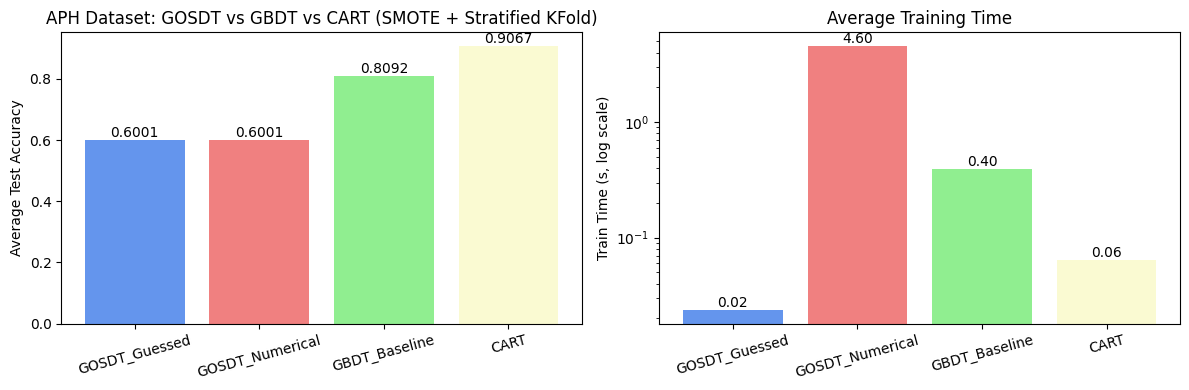

In [36]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from gosdt import GOSDTClassifier, ThresholdGuessBinarizer, NumericBinarizer

# Load Antepartum Hemorrhage data
# df = pd.read_csv("/content/aph.csv")  # Uncomment and update the path if needed
# X, y = df.iloc[:, :-1], df.iloc[:, -1]

# Set random seed and Stratified KFold
SEED = 42
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=SEED)

# Initialize metrics and times dictionaries
metrics = {
    "GOSDT_Guessed": {"train_acc": [], "test_acc": [], "train_time": [], "test_time": []},
    "GOSDT_Numerical": {"train_acc": [], "test_acc": [], "train_time": [], "test_time": []},
    "GBDT_Baseline": {"train_acc": [], "test_acc": [], "train_time": [], "test_time": [], "n_leaves": []},
    "CART": {"train_acc": [], "test_acc": [], "train_time": [], "test_time": [], "n_leaves": []},
}

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\n=== Fold {fold + 1} ===")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # SMOTE on training data only
    smote = SMOTE(random_state=SEED, sampling_strategy=1)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # -------- GOSDT with ThresholdGuessBinarizer --------
    print("-> GOSDT (ThresholdGuessBinarizer + y_ref)")
    tgb = ThresholdGuessBinarizer(n_estimators=200, max_depth=1, random_state=SEED)
    tgb.set_output(transform="pandas")
    X_train_guess = tgb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_guess = tgb.transform(X_test.copy())

    gbdt_ref = GradientBoostingClassifier(n_estimators=60, max_depth=1, random_state=SEED)
    gbdt_ref.fit(X_train_guess, y_train_res)
    warm_labels = gbdt_ref.predict(X_train_guess)

    clf_guess = GOSDTClassifier(regularization=0.001, depth_budget=1, time_limit=1800)

    start_train = time.time()
    clf_guess.fit(X_train_guess, y_train_res, y_ref=warm_labels)
    end_train = time.time()
    metrics["GOSDT_Guessed"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_g = clf_guess.predict(X_test_guess)
    end_test = time.time()
    metrics["GOSDT_Guessed"]["test_time"].append(end_test - start_test)

    y_pred_train_g = clf_guess.predict(X_train_guess)

    metrics["GOSDT_Guessed"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_g))
    metrics["GOSDT_Guessed"]["test_acc"].append(accuracy_score(y_test, y_pred_test_g))

    print(f"Training accuracy: {clf_guess.score(X_train_guess, y_train_res):.4f}")
    for i, tree in enumerate(clf_guess.trees_):
        print(f"Tree {i + 1}:")
        print(tree)

    # -------- GOSDT with NumericBinarizer --------
    print("-> GOSDT (NumericBinarizer)")
    nb = NumericBinarizer()
    nb.set_output(transform="pandas")
    X_train_num = nb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_num = nb.transform(X_test.copy())

    clf_num = GOSDTClassifier(regularization=0.001, depth_budget=1, time_limit=1800)

    start_train = time.time()
    clf_num.fit(X_train_num, y_train_res)
    end_train = time.time()
    metrics["GOSDT_Numerical"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_n = clf_num.predict(X_test_num)
    end_test = time.time()
    metrics["GOSDT_Numerical"]["test_time"].append(end_test - start_test)

    y_pred_train_n = clf_num.predict(X_train_num)

    metrics["GOSDT_Numerical"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_n))
    metrics["GOSDT_Numerical"]["test_acc"].append(accuracy_score(y_test, y_pred_test_n))

    print(f"Training accuracy: {clf_num.score(X_train_num, y_train_res):.4f}")
    for i, tree in enumerate(clf_num.trees_):
        print(f"Tree {i + 1}:")
        print(tree)

    # -------- GBDT Baseline --------
    print("-> GBDT Baseline")
    gbdt = GradientBoostingClassifier(n_estimators=60, max_depth=1, random_state=SEED)

    start_train = time.time()
    gbdt.fit(X_train_res, y_train_res)
    end_train = time.time()
    metrics["GBDT_Baseline"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_b = gbdt.predict(X_test)
    end_test = time.time()
    metrics["GBDT_Baseline"]["test_time"].append(end_test - start_test)

    y_pred_train_b = gbdt.predict(X_train_res)

    # Calculate total number of leaves across all trees
    n_leaves = sum(tree.tree_.n_leaves for est in gbdt.estimators_ for tree in est)
    metrics["GBDT_Baseline"]["n_leaves"].append(n_leaves)

    metrics["GBDT_Baseline"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_b))
    metrics["GBDT_Baseline"]["test_acc"].append(accuracy_score(y_test, y_pred_test_b))

    print(f"Training accuracy: {gbdt.score(X_train_res, y_train_res):.4f}")
    print(f"Number of leaves: {n_leaves}")
    # Print first 5 GBDT trees for inspection
    feature_names = X.columns
    for i, tree in enumerate(sum(gbdt.estimators_, [])):
        #if i < 5:
            print(f"GBDT Tree {i + 1}:")
            tree_str = export_text(tree, feature_names=feature_names)
            print(tree_str)

    # -------- CART --------
    print("-> CART")
    cart = DecisionTreeClassifier(random_state=SEED)  # Aligned with GOSDT depth_budget

    start_train = time.time()
    cart.fit(X_train_res, y_train_res)
    end_train = time.time()
    metrics["CART"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_c = cart.predict(X_test)
    end_test = time.time()
    metrics["CART"]["test_time"].append(end_test - start_test)

    y_pred_train_c = cart.predict(X_train_res)

    # Calculate number of leaves for CART
    n_leaves = cart.tree_.n_leaves
    metrics["CART"]["n_leaves"].append(n_leaves)

    metrics["CART"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_c))
    metrics["CART"]["test_acc"].append(accuracy_score(y_test, y_pred_test_c))

    print(f"Training accuracy: {cart.score(X_train_res, y_train_res):.4f}")
    print(f"Number of leaves: {n_leaves}")
    print("CART Tree:")
    tree_str = export_text(cart, feature_names=X.columns)
    print(tree_str)

# ------------------ Results ------------------
print("\n=== Average Results Over 5 Folds ===")
for model in metrics:
    print(f"\n{model}:")
    print(f"  Average Train Accuracy: {np.mean(metrics[model]['train_acc']):.4f}")
    print(f"  Average Test Accuracy:  {np.mean(metrics[model]['test_acc']):.4f}")
    print(f"  Average Train Time:     {np.mean(metrics[model]['train_time']):.4f}s")
    print(f"  Average Test Time:      {np.mean(metrics[model]['test_time']):.4f}s")
    if "n_leaves" in metrics[model]:
        print(f"  Average Number of Leaves: {np.mean(metrics[model]['n_leaves']):.0f}")

# ------------------ Plot Accuracy ------------------
labels = list(metrics.keys())
test_accuracies = [np.mean(metrics[m]["test_acc"]) for m in labels]
train_times = [np.mean(metrics[m]["train_time"]) for m in labels]

plt.figure(figsize=(12, 4))
# Plot: Accuracy
plt.subplot(1, 2, 1)
bars = plt.bar(labels, test_accuracies, color=["cornflowerblue", "lightcoral", "lightgreen", "lightgoldenrodyellow"])
plt.ylabel("Average Test Accuracy")
plt.title("APH Dataset: GOSDT vs GBDT vs CART (SMOTE + Stratified KFold)")
for bar, acc in zip(bars, test_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{acc:.4f}", ha='center', va='bottom')
plt.xticks(rotation=15)

# Plot: Training Time (log scale)
plt.subplot(1, 2, 2)
bars = plt.bar(labels, train_times, color=["cornflowerblue", "lightcoral", "lightgreen", "lightgoldenrodyellow"])
plt.yscale("log")
plt.ylabel("Train Time (s, log scale)")
plt.title("Average Training Time")
for bar, time_val in zip(bars, train_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{time_val:.2f}", ha='center', va='bottom')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from gosdt import GOSDTClassifier, ThresholdGuessBinarizer, NumericBinarizer

# Load Antepartum Hemorrhage data
# df = pd.read_csv("/content/aph.csv")  # Uncomment and update the path if needed
# X, y = df.iloc[:, :-1], df.iloc[:, -1]

# Set random seed and Stratified KFold
SEED = 42
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Initialize metrics and times dictionaries
metrics = {
    "GOSDT_Guessed": {"train_acc": [], "test_acc": [], "train_time": [], "test_time": []},
    "GOSDT_Numerical": {"train_acc": [], "test_acc": [], "train_time": [], "test_time": []},
    "GBDT_Baseline": {"train_acc": [], "test_acc": [], "train_time": [], "test_time": [], "n_leaves": []},
    "CART": {"train_acc": [], "test_acc": [], "train_time": [], "test_time": [], "n_leaves": []},
}

# Helper function to get feature names safely
def get_feature_names(X):
    if hasattr(X, 'columns'):
        # Convert column names to strings to avoid non-string type issues
        return [str(col) for col in X.columns]
    else:
        # Fallback for NumPy arrays or other types without columns
        return [f"feature_{i}" for i in range(X.shape[1])]

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\n=== Fold {fold + 1} ===")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # SMOTE on training data only
    smote = SMOTE(random_state=SEED, sampling_strategy=1)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Get feature names for tree visualization
    feature_names = get_feature_names(X)

    # -------- GOSDT with ThresholdGuessBinarizer --------
    print("-> GOSDT (ThresholdGuessBinarizer + y_ref)")
    tgb = ThresholdGuessBinarizer(n_estimators=200, max_depth=3, random_state=SEED)
    tgb.set_output(transform="pandas")
    X_train_guess = tgb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_guess = tgb.transform(X_test.copy())

    gbdt_ref = GradientBoostingClassifier(n_estimators=60, max_depth=3, random_state=SEED)
    gbdt_ref.fit(X_train_guess, y_train_res)
    warm_labels = gbdt_ref.predict(X_train_guess)

    clf_guess = GOSDTClassifier(regularization=0.001, depth_budget=1, time_limit=1800)

    start_train = time.time()
    clf_guess.fit(X_train_guess, y_train_res, y_ref=warm_labels)
    end_train = time.time()
    metrics["GOSDT_Guessed"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_g = clf_guess.predict(X_test_guess)
    end_test = time.time()
    metrics["GOSDT_Guessed"]["test_time"].append(end_test - start_test)

    y_pred_train_g = clf_guess.predict(X_train_guess)

    metrics["GOSDT_Guessed"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_g))
    metrics["GOSDT_Guessed"]["test_acc"].append(accuracy_score(y_test, y_pred_test_g))

    print(f"Training accuracy: {clf_guess.score(X_train_guess, y_train_res):.4f}")
    for i, tree in enumerate(clf_guess.trees_):
        print(f"Tree {i + 1}:")
        print(tree)

    # -------- GOSDT with NumericBinarizer --------
    print("-> GOSDT (NumericBinarizer)")
    nb = NumericBinarizer()
    nb.set_output(transform="pandas")
    X_train_num = nb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_num = nb.transform(X_test.copy())

    clf_num = GOSDTClassifier(regularization=0.001, depth_budget=1, time_limit=1800)

    start_train = time.time()
    clf_num.fit(X_train_num, y_train_res)
    end_train = time.time()
    metrics["GOSDT_Numerical"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_n = clf_num.predict(X_test_num)
    end_test = time.time()
    metrics["GOSDT_Numerical"]["test_time"].append(end_test - start_test)

    y_pred_train_n = clf_num.predict(X_train_num)

    metrics["GOSDT_Numerical"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_n))
    metrics["GOSDT_Numerical"]["test_acc"].append(accuracy_score(y_test, y_pred_test_n))

    print(f"Training accuracy: {clf_num.score(X_train_num, y_train_res):.4f}")
    for i, tree in enumerate(clf_num.trees_):
        print(f"Tree {i + 1}:")
        print(tree)

    # -------- GBDT Baseline --------
    print("-> GBDT Baseline")
    gbdt = GradientBoostingClassifier(n_estimators=60, max_depth=3, random_state=SEED)

    start_train = time.time()
    gbdt.fit(X_train_res, y_train_res)
    end_train = time.time()
    metrics["GBDT_Baseline"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_b = gbdt.predict(X_test)
    end_test = time.time()
    metrics["GBDT_Baseline"]["test_time"].append(end_test - start_test)

    y_pred_train_b = gbdt.predict(X_train_res)

    # Calculate total number of leaves across all GBDT trees
    n_leaves = sum(tree.tree_.n_leaves for est in gbdt.estimators_ for tree in est)
    metrics["GBDT_Baseline"]["n_leaves"].append(n_leaves)

    metrics["GBDT_Baseline"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_b))
    metrics["GBDT_Baseline"]["test_acc"].append(accuracy_score(y_test, y_pred_test_b))

    print(f"Training accuracy: {gbdt.score(X_train_res, y_train_res):.4f}")
    print(f"Number of leaves: {n_leaves}")
    # Print first 5 GBDT trees for inspection
    for i, tree in enumerate(sum(gbdt.estimators_, [])):
        if i < 5:
            print(f"GBDT Tree {i + 1}:")
            tree_str = export_text(tree, feature_names=feature_names)
            print(tree_str)

    # -------- CART --------
    print("-> CART")
    cart = DecisionTreeClassifier(max_depth=3, random_state=SEED)  # Aligned with GOSDT depth_budget

    start_train = time.time()
    cart.fit(X_train_res, y_train_res)
    end_train = time.time()
    metrics["CART"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_c = cart.predict(X_test)
    end_test = time.time()
    metrics["CART"]["test_time"].append(end_test - start_test)

    y_pred_train_c = cart.predict(X_train_res)

    # Calculate number of leaves for CART
    n_leaves = cart.tree_.n_leaves  # Number of terminal nodes in the tree
    metrics["CART"]["n_leaves"].append(n_leaves)

    metrics["CART"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_c))
    metrics["CART"]["test_acc"].append(accuracy_score(y_test, y_pred_test_c))

    print(f"Training accuracy: {cart.score(X_train_res, y_train_res):.4f}")
    print(f"Number of leaves: {n_leaves} (verified as terminal nodes)")
    print("CART Tree:")
    # Use export_text with safe feature names
    try:
        tree_str = export_text(cart, feature_names=feature_names)
        print(tree_str)
    except Exception as e:
        print(f"Error in export_text: {e}")
        print("Falling back to default feature names")
        tree_str = export_text(cart)
        print(tree_str)
    # Verify leaf count manually
    tree_nodes = cart.tree_.node_count
    children_left = cart.tree_.children_left
    children_right = cart.tree_.children_right
    manual_leaf_count = sum(1 for i in range(tree_nodes) if children_left[i] == children_right[i] == -1)
    print(f"Manually counted leaves: {manual_leaf_count} (should match n_leaves)")
    print(f"Feature names used: {feature_names}")

# ------------------ Results ------------------
print("\n=== Average Results Over 5 Folds ===")
for model in metrics:
    print(f"\n{model}:")
    print(f"  Average Train Accuracy: {np.mean(metrics[model]['train_acc']):.4f}")
    print(f"  Average Test Accuracy:  {np.mean(metrics[model]['test_acc']):.4f}")
    print(f"  Average Train Time:     {np.mean(metrics[model]['train_time']):.4f}s")
    print(f"  Average Test Time:      {np.mean(metrics[model]['test_time']):.4f}s")
    if "n_leaves" in metrics[model]:
        print(f"  Average Number of Leaves: {np.mean(metrics[model]['n_leaves']):.0f}")

# ------------------ Plot Accuracy and Training Time ------------------
labels = list(metrics.keys())
test_accuracies = [np.mean(metrics[m]["test_acc"]) for m in labels]
train_times = [np.mean(metrics[m]["train_time"]) for m in labels]

plt.figure(figsize=(12, 4))
# Plot: Accuracy
plt.subplot(1, 2, 1)
bars = plt.bar(labels, test_accuracies, color=["cornflowerblue", "lightcoral", "lightgreen", "lightgoldenrodyellow"])
plt.ylabel("Average Test Accuracy")
plt.title("APH Dataset: GOSDT vs GBDT vs CART (SMOTE + Stratified KFold)")
for bar, acc in zip(bars, test_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{acc:.4f}", ha='center', va='bottom')
plt.xticks(rotation=15)

# Plot: Training Time (log scale)
plt.subplot(1, 2, 2)
bars = plt.bar(labels, train_times, color=["cornflowerblue", "lightcoral", "lightgreen", "lightgoldenrodyellow"])
plt.yscale("log")
plt.ylabel("Train Time (s, log scale)")
plt.title("Average Training Time")
for bar, time_val in zip(bars, train_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{time_val:.2f}", ha='center', va='bottom')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from gosdt import GOSDTClassifier, ThresholdGuessBinarizer, NumericBinarizer

# Load Antepartum Hemorrhage data
# df = pd.read_csv("/content/aph.csv")  # Uncomment and update the path if needed
# X, y = df.iloc[:, :-1], df.iloc[:, -1]

# Set random seed and Stratified KFold
SEED = 42
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# Initialize metrics and times dictionaries
metrics = {
    "GOSDT_Guessed": {"train_acc": [], "test_acc": [], "train_time": [], "test_time": []},
    "GOSDT_Numerical": {"train_acc": [], "test_acc": [], "train_time": [], "test_time": []},
    "GBDT_Baseline": {"train_acc": [], "test_acc": [], "train_time": [], "test_time": [], "n_leaves": []},
    "CART": {"train_acc": [], "test_acc": [], "train_time": [], "test_time": [], "n_leaves": []},
}

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\n=== Fold {fold + 1} ===")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # SMOTE on training data only
    smote = SMOTE(random_state=SEED, sampling_strategy=1)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # -------- GOSDT with ThresholdGuessBinarizer --------
    print("-> GOSDT (ThresholdGuessBinarizer + y_ref)")
    tgb = ThresholdGuessBinarizer(n_estimators=200, max_depth=1, random_state=SEED)
    tgb.set_output(transform="pandas")
    X_train_guess = tgb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_guess = tgb.transform(X_test.copy())

    gbdt_ref = GradientBoostingClassifier(n_estimators=60, max_depth=3, random_state=SEED)
    gbdt_ref.fit(X_train_guess, y_train_res)
    warm_labels = gbdt_ref.predict(X_train_guess)

    clf_guess = GOSDTClassifier(regularization=0.001, depth_budget=3, time_limit=1800)

    start_train = time.time()
    clf_guess.fit(X_train_guess, y_train_res, y_ref=warm_labels)
    end_train = time.time()
    metrics["GOSDT_Guessed"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_g = clf_guess.predict(X_test_guess)
    end_test = time.time()
    metrics["GOSDT_Guessed"]["test_time"].append(end_test - start_test)

    y_pred_train_g = clf_guess.predict(X_train_guess)

    metrics["GOSDT_Guessed"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_g))
    metrics["GOSDT_Guessed"]["test_acc"].append(accuracy_score(y_test, y_pred_test_g))

    print(f"Training accuracy: {clf_guess.score(X_train_guess, y_train_res):.4f}")
    for i, tree in enumerate(clf_guess.trees_):
        print(f"Tree {i + 1}:")
        print(tree)

    # -------- GOSDT with NumericBinarizer --------
    print("-> GOSDT (NumericBinarizer)")
    nb = NumericBinarizer()
    nb.set_output(transform="pandas")
    X_train_num = nb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_num = nb.transform(X_test.copy())

    clf_num = GOSDTClassifier(regularization=0.001, depth_budget=3, time_limit=1800)

    start_train = time.time()
    clf_num.fit(X_train_num, y_train_res)
    end_train = time.time()
    metrics["GOSDT_Numerical"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_n = clf_num.predict(X_test_num)
    end_test = time.time()
    metrics["GOSDT_Numerical"]["test_time"].append(end_test - start_test)

    y_pred_train_n = clf_num.predict(X_train_num)

    metrics["GOSDT_Numerical"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_n))
    metrics["GOSDT_Numerical"]["test_acc"].append(accuracy_score(y_test, y_pred_test_n))

    print(f"Training accuracy: {clf_num.score(X_train_num, y_train_res):.4f}")
    for i, tree in enumerate(clf_num.trees_):
        print(f"Tree {i + 1}:")
        print(tree)

    # -------- GBDT Baseline --------
    print("-> GBDT Baseline")
    gbdt = GradientBoostingClassifier(n_estimators=60, max_depth=3, random_state=SEED)

    start_train = time.time()
    gbdt.fit(X_train_res, y_train_res)
    end_train = time.time()
    metrics["GBDT_Baseline"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_b = gbdt.predict(X_test)
    end_test = time.time()
    metrics["GBDT_Baseline"]["test_time"].append(end_test - start_test)

    y_pred_train_b = gbdt.predict(X_train_res)

    # Calculate total number of leaves across all GBDT trees
    n_leaves = sum(tree.tree_.n_leaves for est in gbdt.estimators_ for tree in est)
    metrics["GBDT_Baseline"]["n_leaves"].append(n_leaves)

    metrics["GBDT_Baseline"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_b))
    metrics["GBDT_Baseline"]["test_acc"].append(accuracy_score(y_test, y_pred_test_b))

    print(f"Training accuracy: {gbdt.score(X_train_res, y_train_res):.4f}")
    print(f"Number of leaves: {n_leaves}")
    # Print first 5 GBDT trees for inspection
    feature_names = X.columns
    for i, tree in enumerate(sum(gbdt.estimators_, [])):
        if i < 5:
            print(f"GBDT Tree {i + 1}:")
            tree_str = export_text(tree, feature_names=feature_names)
            print(tree_str)

    # -------- CART --------
    print("-> CART")
    cart = DecisionTreeClassifier(max_depth=3, random_state=SEED)  # Aligned with GOSDT depth_budget

    start_train = time.time()
    cart.fit(X_train_res, y_train_res)
    end_train = time.time()
    metrics["CART"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_c = cart.predict(X_test)
    end_test = time.time()
    metrics["CART"]["test_time"].append(end_test - start_test)

    y_pred_train_c = cart.predict(X_train_res)

    # Calculate number of leaves for CART (leaf nodes are terminal nodes in the tree)
    n_leaves = cart.tree_.n_leaves  # Direct access to the number of leaf nodes
    metrics["CART"]["n_leaves"].append(n_leaves)

    metrics["CART"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_c))
    metrics["CART"]["test_acc"].append(accuracy_score(y_test, y_pred_test_c))

    print(f"Training accuracy: {cart.score(X_train_res, y_train_res):.4f}")
    print(f"Number of leaves: {n_leaves} (verified as terminal nodes in the decision tree)")
    print("CART Tree:")
    tree_str = export_text(cart, feature_names=X.columns)
    print(tree_str)
    # Additional debugging: Count leaves manually from tree structure
    tree_nodes = cart.tree_.node_count
    children_left = cart.tree_.children_left
    children_right = cart.tree_.children_right
    manual_leaf_count = sum(1 for i in range(tree_nodes) if children_left[i] == children_right[i] == -1)
    print(f"Manually counted leaves: {manual_leaf_count} (should match n_leaves)")

# ------------------ Results ------------------
print("\n=== Average Results Over 5 Folds ===")
for model in metrics:
    print(f"\n{model}:")
    print(f"  Average Train Accuracy: {np.mean(metrics[model]['train_acc']):.4f}")
    print(f"  Average Test Accuracy:  {np.mean(metrics[model]['test_acc']):.4f}")
    print(f"  Average Train Time:     {np.mean(metrics[model]['train_time']):.4f}s")
    print(f"  Average Test Time:      {np.mean(metrics[model]['test_time']):.4f}s")
    if "n_leaves" in metrics[model]:
        print(f"  Average Number of Leaves: {np.mean(metrics[model]['n_leaves']):.0f}")

# ------------------ Plot Accuracy and Training Time ------------------
labels = list(metrics.keys())
test_accuracies = [np.mean(metrics[m]["test_acc"]) for m in labels]
train_times = [np.mean(metrics[m]["train_time"]) for m in labels]

plt.figure(figsize=(12, 4))
# Plot: Accuracy
plt.subplot(1, 2, 1)
bars = plt.bar(labels, test_accuracies, color=["cornflowerblue", "lightcoral", "lightgreen", "lightgoldenrodyellow"])
plt.ylabel("Average Test Accuracy")
plt.title("APH Dataset: GOSDT vs GBDT vs CART (SMOTE + Stratified KFold)")
for bar, acc in zip(bars, test_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{acc:.4f}", ha='center', va='bottom')
plt.xticks(rotation=15)

# Plot: Training Time (log scale)
plt.subplot(1, 2, 2)
bars = plt.bar(labels, train_times, color=["cornflowerblue", "lightcoral", "lightgreen", "lightgoldenrodyellow"])
plt.yscale("log")
plt.ylabel("Train Time (s, log scale)")
plt.title("Average Training Time")
for bar, time_val in zip(bars, train_times):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{time_val:.2f}", ha='center', va='bottom')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

# APH final

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from gosdt import GOSDTClassifier, ThresholdGuessBinarizer, NumericBinarizer

# Load Antepartum Hemorrhage data
# df = pd.read_csv("/content/aph.csv")  # Uncomment and update the path if needed
# X, y = df.iloc[:, :-1], df.iloc[:, -1]
GBDT_N_EST = 200
GBDT_MAX_DEPTH = 3
# Set random seed and Stratified KFold
SEED = 42
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

metrics = {
    "GOSDT_Guessed": {"train_acc": [], "test_acc": []},
    "GOSDT_Numerical": {"train_acc": [], "test_acc": []},
    "GBDT_Baseline": {"train_acc": [], "test_acc": []},
}

times = {
    "GOSDT_Guessed": {"train_time": [], "test_time": []},
    "GOSDT_Numerical": {"train_time": [], "test_time": []},
    "GBDT_Baseline": {"train_time": [], "test_time": []},
}

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\n=== Fold {fold + 1} ===")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # SMOTE on training data only
    smote = SMOTE(random_state=SEED, sampling_strategy=1)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # -------- GOSDT with ThresholdGuessBinarizer --------
    print("-> GOSDT (ThresholdGuessBinarizer + y_ref)")
    tgb = ThresholdGuessBinarizer(n_estimators=GBDT_N_EST, max_depth=GBDT_MAX_DEPTH, random_state=SEED)
    tgb.set_output(transform="pandas")
    X_train_guess = tgb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_guess = tgb.transform(X_test.copy())

    gbdt_ref = GradientBoostingClassifier(n_estimators=GBDT_N_EST, max_depth=GBDT_MAX_DEPTH, random_state=SEED)
    gbdt_ref.fit(X_train_guess, y_train_res)
    warm_labels = gbdt_ref.predict(X_train_guess)

    clf_guess = GOSDTClassifier(regularization=0.001, depth_budget=2, time_limit=1800)

    start_train = time.time()
    clf_guess.fit(X_train_guess, y_train_res, y_ref=warm_labels)
    end_train = time.time()
    times["GOSDT_Guessed"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_g = clf_guess.predict(X_test_guess)
    end_test = time.time()
    times["GOSDT_Guessed"]["test_time"].append(end_test - start_test)

    y_pred_train_g = clf_guess.predict(X_train_guess)

    metrics["GOSDT_Guessed"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_g))
    metrics["GOSDT_Guessed"]["test_acc"].append(accuracy_score(y_test, y_pred_test_g))

    # -------- GOSDT with NumericBinarizer --------
    print("-> GOSDT (NumericBinarizer)")
    nb = NumericBinarizer()
    nb.set_output(transform="pandas")
    X_train_num = nb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_num = nb.transform(X_test.copy())

    clf_num = GOSDTClassifier(regularization=0.001, depth_budget=2, time_limit=1800)

    start_train = time.time()
    clf_num.fit(X_train_num, y_train_res)
    end_train = time.time()
    times["GOSDT_Numerical"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_n = clf_num.predict(X_test_num)
    end_test = time.time()
    times["GOSDT_Numerical"]["test_time"].append(end_test - start_test)

    y_pred_train_n = clf_num.predict(X_train_num)

    metrics["GOSDT_Numerical"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_n))
    metrics["GOSDT_Numerical"]["test_acc"].append(accuracy_score(y_test, y_pred_test_n))

    # -------- GBDT Baseline --------
    print("-> GBDT Baseline")
    gbdt = GradientBoostingClassifier(n_estimators=GBDT_N_EST, max_depth=GBDT_MAX_DEPTH, random_state=SEED)

    start_train = time.time()
    gbdt.fit(X_train_res, y_train_res)
    end_train = time.time()
    times["GBDT_Baseline"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_b = gbdt.predict(X_test)
    end_test = time.time()
    times["GBDT_Baseline"]["test_time"].append(end_test - start_test)

    y_pred_train_b = gbdt.predict(X_train_res)

    metrics["GBDT_Baseline"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_b))
    metrics["GBDT_Baseline"]["test_acc"].append(accuracy_score(y_test, y_pred_test_b))

# ------------------ Accuracy Results ------------------
print("\n=== Median Accuracy Results Over Folds ===")
for model in metrics:
    print(f"\n{model}:")
    print(f"  Median Train Accuracy: {np.median(metrics[model]['train_acc']):.4f}")
    print(f"  Median Test Accuracy:  {np.median(metrics[model]['test_acc']):.4f}")

# ------------------ Timing Results ------------------
print("\n=== Median Training & Testing Time (seconds) ===")
for model in times:
    print(f"\n{model}:")
    print(f"  Median Train Time: {np.median(times[model]['train_time']):.2f} sec")
    print(f"  Median Test Time:  {np.median(times[model]['test_time']):.4f} sec")

# ------------------ Optional: Plot Accuracy ------------------
labels = list(metrics.keys())
median_test_accuracies = [np.median(metrics[m]["test_acc"]) for m in labels]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, median_test_accuracies, color=["cornflowerblue", "lightcoral", "lightgreen"])
plt.ylabel("Median Test Accuracy")
plt.title("APH Dataset: GOSDT vs GBDT (SMOTE + Stratified KFold)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
pip install gosdt

# GOSDT+ TH

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from gosdt import GOSDTClassifier, ThresholdGuessBinarizer, NumericBinarizer

# === Parameters ===
GBDT_N_EST = 40
GBDT_MAX_DEPTH = 1
REGULARIZATION = 0.001
DEPTH_BUDGET = 3
TIME_LIMIT = 1800
SEED = 42

# === Load dataset ===
try:
    df = pd.read_csv("/kaggle/input/final-compas-15062025/compas (4).csv")
except FileNotFoundError:
    print("Error: compas (4).csv not found.")
    exit()

X, y = df.iloc[:, :-1], df.iloc[:, -1]

# === Initialize metrics ===
metrics = {
    "GOSDT_Guessed": {"train_time": [], "test_time": [], "train_acc": [], "test_acc": []},
    "GOSDT_Guessed_Threshold_Time": [],
    "GOSDT_Numerical": {"train_time": [], "test_time": [], "train_acc": [], "test_acc": []},
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\n=== Fold {fold + 1} ===")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    ##### GOSDT with ThresholdGuessBinarizer #####
    print("-> Training GOSDT (Guessed Thresholds)")

    tgb = ThresholdGuessBinarizer(n_estimators=GBDT_N_EST, max_depth=GBDT_MAX_DEPTH, random_state=SEED)
    tgb.set_output(transform="pandas")

    start_thresh = time.time()
    X_train_guessed = tgb.fit_transform(X_train.copy(), y_train.copy())
    thresh_time = time.time() - start_thresh

    X_test_guessed = tgb.transform(X_test.copy())

    clf_guessed = GOSDTClassifier(
        regularization=REGULARIZATION,
        depth_budget=DEPTH_BUDGET,
        time_limit=TIME_LIMIT,
        verbose=False,
    )

    start_train = time.time()
    clf_guessed.fit(X_train_guessed, y_train)
    gosdt_train_time = time.time() - start_train

    start_test = time.time()
    y_pred_train = clf_guessed.predict(X_train_guessed)
    y_pred_test = clf_guessed.predict(X_test_guessed)
    test_time = time.time() - start_test

    metrics["GOSDT_Guessed_Threshold_Time"].append(thresh_time)
    metrics["GOSDT_Guessed"]["train_time"].append(gosdt_train_time)
    metrics["GOSDT_Guessed"]["test_time"].append(test_time)
    metrics["GOSDT_Guessed"]["train_acc"].append(accuracy_score(y_train, y_pred_train))
    metrics["GOSDT_Guessed"]["test_acc"].append(accuracy_score(y_test, y_pred_test))
    print(f"   Train Acc: {accuracy_score(y_train, y_pred_train):.4f}, Test Acc: {accuracy_score(y_test, y_pred_test):.4f}, GOSDT Time: {gosdt_train_time:.2f}s, Threshold Time: {thresh_time:.2f}s")

    ##### GOSDT with NumericBinarizer #####
    print("-> Training GOSDT (Numeric Binarizer)")

    nb = NumericBinarizer()
    nb.set_output(transform="pandas")
    X_train_num = nb.fit_transform(X_train.copy(), y_train.copy())
    X_test_num = nb.transform(X_test.copy())

    clf_num = GOSDTClassifier(
        regularization=REGULARIZATION,
        depth_budget=DEPTH_BUDGET,
        time_limit=TIME_LIMIT,
        verbose=False,
    )

    start_train = time.time()
    clf_num.fit(X_train_num, y_train)
    gosdt_num_time = time.time() - start_train

    start_test = time.time()
    y_pred_train_num = clf_num.predict(X_train_num)
    y_pred_test_num = clf_num.predict(X_test_num)
    test_time_num = time.time() - start_test

    metrics["GOSDT_Numerical"]["train_time"].append(gosdt_num_time)
    metrics["GOSDT_Numerical"]["test_time"].append(test_time_num)
    metrics["GOSDT_Numerical"]["train_acc"].append(accuracy_score(y_train, y_pred_train_num))
    metrics["GOSDT_Numerical"]["test_acc"].append(accuracy_score(y_test, y_pred_test_num))
    print(f"   Train Acc: {accuracy_score(y_train, y_pred_train_num):.4f}, Test Acc: {accuracy_score(y_test, y_pred_test_num):.4f}, GOSDT Time: {gosdt_num_time:.2f}s")

# === Display Median Results ===
print("\n=== Median Results Over 5 Folds ===")
for model_name, data in metrics.items():
    if isinstance(data, dict):
        print(f"\n{model_name}:")
        print(f"  Train Accuracy: {np.median(data['train_acc']):.4f}")
        print(f"  Test Accuracy:  {np.median(data['test_acc']):.4f}")
        print(f"  GOSDT Train Time: {np.median(data['train_time']):.4f}s")
        print(f"  Prediction Time: {np.median(data['test_time']):.4f}s")

print(f"\nThreshold Guessing Time (median): {np.median(metrics['GOSDT_Guessed_Threshold_Time']):.4f}s")

# === Plotting Training Time Breakdown ===
plt.figure(figsize=(10, 6))

labels = ["GOSDT w/ Guessing", "GOSDT w/o Guessing"]
x = np.arange(len(labels))

guess_time = np.median(metrics["GOSDT_Guessed"]["train_time"])
thresh_time = np.median(metrics["GOSDT_Guessed_Threshold_Time"])
numeric_time = np.median(metrics["GOSDT_Numerical"]["train_time"])

# Stacked bar for guessed threshold + GOSDT
plt.bar(x[0], thresh_time, color='green', label='Threshold Guessing Time')
plt.bar(x[0], guess_time, bottom=thresh_time, color='cornflowerblue', label='GOSDT Train Time (Guessed)')

# Plain bar for numeric GOSDT
plt.bar(x[1], numeric_time, color='orange', label='GOSDT Train Time (Numeric)')

plt.ylabel("Median Training Time (log scale, seconds)")
plt.title("Training Time Breakdown")
plt.xticks(x, labels)
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.show()


# GOSDT+th APH

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from gosdt import GOSDTClassifier, ThresholdGuessBinarizer, NumericBinarizer

# Load Antepartum Hemorrhage data
# df = pd.read_csv("/content/aph.csv")  # Uncomment and update the path if needed
# X, y = df.iloc[:, :-1], df.iloc[:, -1]
GBDT_N_EST = 200
GBDT_MAX_DEPTH = 1
SEED = 42
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

metrics = {
    "GOSDT_Guessed": {"train_acc": [], "test_acc": []},
    "GOSDT_Numerical": {"train_acc": [], "test_acc": []},
    "GBDT_Baseline": {"train_acc": [], "test_acc": []},
}

times = {
    "GOSDT_Guessed": {"train_time": [], "test_time": []},
    "GOSDT_Numerical": {"train_time": [], "test_time": []},
    "GBDT_Baseline": {"train_time": [], "test_time": []},
}

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\n=== Fold {fold + 1} ===")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # SMOTE on training data only
    smote = SMOTE(random_state=SEED, sampling_strategy=0.8)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # -------- GOSDT with ThresholdGuessBinarizer --------
    print("-> GOSDT (ThresholdGuessBinarizer)")
    tgb = ThresholdGuessBinarizer(n_estimators=GBDT_N_EST, max_depth=GBDT_MAX_DEPTH, random_state=SEED)
    tgb.set_output(transform="pandas")
    X_train_guess = tgb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_guess = tgb.transform(X_test.copy())

    clf_guess = GOSDTClassifier(regularization=0.001, depth_budget=2, time_limit=1800)

    start_train = time.time()
    clf_guess.fit(X_train_guess, y_train_res)  # No y_ref parameter here
    end_train = time.time()
    times["GOSDT_Guessed"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_g = clf_guess.predict(X_test_guess)
    end_test = time.time()
    times["GOSDT_Guessed"]["test_time"].append(end_test - start_test)

    y_pred_train_g = clf_guess.predict(X_train_guess)

    metrics["GOSDT_Guessed"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_g))
    metrics["GOSDT_Guessed"]["test_acc"].append(accuracy_score(y_test, y_pred_test_g))

    # -------- GOSDT with NumericBinarizer --------
    print("-> GOSDT (NumericBinarizer)")
    nb = NumericBinarizer()
    nb.set_output(transform="pandas")
    X_train_num = nb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_num = nb.transform(X_test.copy())

    clf_num = GOSDTClassifier(regularization=0.001, depth_budget=1, time_limit=1800)

    start_train = time.time()
    clf_num.fit(X_train_num, y_train_res)
    end_train = time.time()
    times["GOSDT_Numerical"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_n = clf_num.predict(X_test_num)
    end_test = time.time()
    times["GOSDT_Numerical"]["test_time"].append(end_test - start_test)

    y_pred_train_n = clf_num.predict(X_train_num)

    metrics["GOSDT_Numerical"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_n))
    metrics["GOSDT_Numerical"]["test_acc"].append(accuracy_score(y_test, y_pred_test_n))

    # -------- GBDT Baseline --------
    print("-> GBDT Baseline")
    gbdt = GradientBoostingClassifier(n_estimators=GBDT_N_EST, max_depth=GBDT_MAX_DEPTH, random_state=SEED)

    start_train = time.time()
    gbdt.fit(X_train_res, y_train_res)
    end_train = time.time()
    times["GBDT_Baseline"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_b = gbdt.predict(X_test)
    end_test = time.time()
    times["GBDT_Baseline"]["test_time"].append(end_test - start_test)

    y_pred_train_b = gbdt.predict(X_train_res)

    metrics["GBDT_Baseline"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_b))
    metrics["GBDT_Baseline"]["test_acc"].append(accuracy_score(y_test, y_pred_test_b))

# ------------------ Accuracy Results ------------------
print("\n=== Median Accuracy Results Over Folds ===")
for model in metrics:
    print(f"\n{model}:")
    print(f"  Median Train Accuracy: {np.median(metrics[model]['train_acc']):.4f}")
    print(f"  Median Test Accuracy:  {np.median(metrics[model]['test_acc']):.4f}")

# ------------------ Timing Results ------------------
print("\n=== Median Training & Testing Time (seconds) ===")
for model in times:
    print(f"\n{model}:")
    print(f"  Median Train Time: {np.median(times[model]['train_time']):.2f} sec")
    print(f"  Median Test Time:  {np.median(times[model]['test_time']):.4f} sec")

# ------------------ Optional: Plot Accuracy ------------------
labels = list(metrics.keys())
median_test_accuracies = [np.median(metrics[m]["test_acc"]) for m in labels]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, median_test_accuracies, color=["cornflowerblue", "lightcoral", "lightgreen"])
plt.ylabel("Median Test Accuracy")
plt.title("APH Dataset: GOSDT vs GBDT (SMOTE + Stratified KFold)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
pip install gosdt

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from gosdt import GOSDTClassifier, ThresholdGuessBinarizer, NumericBinarizer

# Load Antepartum Hemorrhage data
# df = pd.read_csv("/content/aph.csv")  # Uncomment and update the path if needed
# X, y = df.iloc[:, :-1], df.iloc[:, -1]
GBDT_N_EST = 200
GBDT_MAX_DEPTH = 1
SEED = 42
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

metrics = {
    "GOSDT_Guessed": {"train_acc": [], "test_acc": []},
    "GOSDT_Numerical": {"train_acc": [], "test_acc": []},
}

times = {
    "GOSDT_Guessed": {"train_time": [], "test_time": [], "threshold_guess_time": []},
    "GOSDT_Numerical": {"train_time": [], "test_time": []},
}

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\n=== Fold {fold + 1} ===")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # SMOTE on training data only
    smote = SMOTE(random_state=SEED, sampling_strategy=0.8)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # -------- GOSDT with ThresholdGuessBinarizer --------
    print("-> GOSDT (ThresholdGuessBinarizer)")
    tgb = ThresholdGuessBinarizer(n_estimators=GBDT_N_EST, max_depth=GBDT_MAX_DEPTH, random_state=SEED)
    tgb.set_output(transform="pandas")

    start_guess = time.time()
    X_train_guess = tgb.fit_transform(X_train_res.copy(), y_train_res.copy())
    end_guess = time.time()
    times["GOSDT_Guessed"]["threshold_guess_time"].append(end_guess - start_guess)

    X_test_guess = tgb.transform(X_test.copy())

    clf_guess = GOSDTClassifier(regularization=0.001, depth_budget=2, time_limit=1800)

    start_train = time.time()
    clf_guess.fit(X_train_guess, y_train_res)
    end_train = time.time()
    times["GOSDT_Guessed"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_g = clf_guess.predict(X_test_guess)
    end_test = time.time()
    times["GOSDT_Guessed"]["test_time"].append(end_test - start_test)

    y_pred_train_g = clf_guess.predict(X_train_guess)

    metrics["GOSDT_Guessed"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_g))
    metrics["GOSDT_Guessed"]["test_acc"].append(accuracy_score(y_test, y_pred_test_g))

    # -------- GOSDT with NumericBinarizer --------
    print("-> GOSDT (NumericBinarizer)")
    nb = NumericBinarizer()
    nb.set_output(transform="pandas")
    X_train_num = nb.fit_transform(X_train_res.copy(), y_train_res.copy())
    X_test_num = nb.transform(X_test.copy())

    clf_num = GOSDTClassifier(regularization=0.001, depth_budget=1, time_limit=1800)

    start_train = time.time()
    clf_num.fit(X_train_num, y_train_res)
    end_train = time.time()
    times["GOSDT_Numerical"]["train_time"].append(end_train - start_train)

    start_test = time.time()
    y_pred_test_n = clf_num.predict(X_test_num)
    end_test = time.time()
    times["GOSDT_Numerical"]["test_time"].append(end_test - start_test)

    y_pred_train_n = clf_num.predict(X_train_num)

    metrics["GOSDT_Numerical"]["train_acc"].append(accuracy_score(y_train_res, y_pred_train_n))
    metrics["GOSDT_Numerical"]["test_acc"].append(accuracy_score(y_test, y_pred_test_n))

# ------------------ Accuracy Results ------------------
print("\n=== Median Accuracy Results Over Folds ===")
for model in metrics:
    print(f"\n{model}:")
    print(f"  Median Train Accuracy: {np.median(metrics[model]['train_acc']):.4f}")
    print(f"  Median Test Accuracy:  {np.median(metrics[model]['test_acc']):.4f}")

# ------------------ Timing Results ------------------
print("\n=== Median Training & Testing Time (seconds) ===")
for model in times:
    print(f"\n{model}:")
    if "threshold_guess_time" in times[model]:
        print(f"  Median Threshold Guessing Time: {np.median(times[model]['threshold_guess_time']):.4f} sec")
    print(f"  Median Train Time: {np.median(times[model]['train_time']):.2f} sec")
    print(f"  Median Test Time:  {np.median(times[model]['test_time']):.4f} sec")

# ------------------ Optional: Plot Accuracy ------------------
labels = list(metrics.keys())
median_test_accuracies = [np.median(metrics[m]["test_acc"]) for m in labels]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, median_test_accuracies, color=["cornflowerblue", "lightcoral"])
plt.ylabel("Median Test Accuracy")
plt.title("APH Dataset: GOSDT Models (SMOTE + Stratified KFold)")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for D=3 (COMPAS DATASET)
# Note: 'GOSDT + Guessing Strategy' is referred to as 'Ours' in the image
# 'GOSDT' is referred to as 'gosdt+th+lb'
# 'GBDT' is referred to as 'dl8.5' or 'GBDT' depending on context in the image legend,
# but for D=3 table, it's just 'GBDT'. We'll align with the legend.

data = {
    'GOSDT': {
        'training_time': 13.5897,
        'train_accuracy': 0.6857,
        'test_accuracy': 0.6748
    },
    'GOSDT + Guessing Strategy': {
        'training_time': 5.1949,
        'train_accuracy': 0.6857,
        'test_accuracy': 0.6748
    },
    
}

# Baseline accuracies from the image for D=3
# These are approximate values taken visually from the horizontal dashed lines.
baseline_train_accuracy = 0.6949
baseline_test_accuracy = 0.6819

# Setup plot styles
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Inter'] # Assuming 'Inter' font is installed or a suitable sans-serif
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 16

# Define colors and markers for each method to match the image legend
colors = {
    'GOSDT': '#4CAF50',  # Greenish for gosdt+th+lb (approximating blue-green in image)
    'GOSDT + Guessing Strategy': '#FFC107', # Orange for Ours (star)
    'GBDT': '#8884d8' # Purple-ish for GBDT/dl8.5
}

markers = {
    'GOSDT': 's',  # Square for GOSDT
    'GOSDT + Guessing Strategy': '*', # Star for Ours
    'GBDT': 'o'  # Circle for GBDT/dl8.5
}

# Figure and Subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7)) # 1 row, 2 columns for side-by-side plots
fig.suptitle('Accuracy vs Run Time (COMPAS, depth limit=3)', fontsize=18, y=1.02)


# --- Plot 1: Training Accuracy vs Run Time ---
ax1 = axes[0]
ax1.set_title('Training Accuracy vs Run Time', fontsize=16)
ax1.set_xlabel('Training Time (s) (log scale)', fontsize=14)
ax1.set_ylabel('Training Accuracy', fontsize=14)
ax1.set_xscale('log') # Set x-axis to logarithmic scale
ax1.set_xlim(0.1, 100) # Set x-axis limits
ax1.set_ylim(0.65, 0.71) # Set y-axis limits for training accuracy
ax1.grid(True, which="both", ls="--", c='0.7') # Add grid lines

# Plot data points for Training Accuracy
for method, vals in data.items():
    ax1.scatter(
        vals['training_time'],
        vals['train_accuracy'],
        s=200, # Size of the markers
        color=colors[method],
        marker=markers[method],
        label=method,
        edgecolor='black', # Add edge for better visibility
        linewidth=0.8
    )

# Add baseline line for Training Accuracy
ax1.axhline(
    y=baseline_train_accuracy,
    color='black',
    linestyle='--',
    linewidth=1.5,
    label=f'Baseline ({baseline_train_accuracy})'
)

# Add text annotations for 'run time saving' and 'timeout' if applicable and visually suggested by the image.
# This requires knowing the specific points for these annotations, which aren't in the table.
# For now, we'll just plot the data points and the baseline.
# If you provide specific coordinates for these arrows/labels, they can be added.

ax1.legend(loc='lower left', bbox_to_anchor=(0, 0)) # Adjust legend position


# --- Plot 2: Test Accuracy vs Run Time ---
ax2 = axes[1]
ax2.set_title('Test Accuracy vs Run Time', fontsize=16)
ax2.set_xlabel('Training Time (s) (log scale)', fontsize=14)
ax2.set_ylabel('Test Accuracy', fontsize=14)
ax2.set_xscale('log') # Set x-axis to logarithmic scale
ax2.set_xlim(0.1, 100) # Set x-axis limits
ax2.set_ylim(0.65, 0.71) # Set y-axis limits for test accuracy
ax2.grid(True, which="both", ls="--", c='0.7') # Add grid lines

# Plot data points for Test Accuracy
for method, vals in data.items():
    ax2.scatter(
        vals['training_time'],
        vals['test_accuracy'],
        s=200, # Size of the markers
        color=colors[method],
        marker=markers[method],
        label=method,
        edgecolor='black',
        linewidth=0.8
    )

# Add baseline line for Test Accuracy
ax2.axhline(
    y=baseline_test_accuracy,
    color='black',
    linestyle='--',
    linewidth=1.5,
    label=f'Baseline ({baseline_test_accuracy})'
)

# Add text annotations if applicable (same as for training accuracy)

ax2.legend(loc='lower left', bbox_to_anchor=(0, 0)) # Adjust legend position


# Adjust layout to prevent overlapping titles/labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for the suptitle

# Show the plot
plt.show()

# You can save the plot to a file if needed:
# plt.savefig('accuracy_vs_runtime_d3.png', dpi=300, bbox_inches='tight')


In [ ]:
pip install gosdt

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from gosdt import GOSDTClassifier, ThresholdGuessBinarizer, NumericBinarizer

# === Parameters ===
GBDT_N_EST = 100
GBDT_MAX_DEPTH = 3
REGULARIZATION = 0.001
DEPTH_BUDGET = 5
TIME_LIMIT = 1800  # Increased for potentially longer NumericBinarizer runs
SEED = 42

# === Load dataset ===
# Make sure to replace "/content/compas (4).csv" with the actual path to your CSV file
# For example, if you upload it directly to Colab:
# df = pd.read_csv("compas (4).csv")
try:
    df = pd.read_csv("/kaggle/input/final-compas-15062025/compas (4).csv")
except FileNotFoundError:
    print("Error: compas (4).csv not found. Please upload the file or update the path.")
    exit()

X, y = df.iloc[:, :-1], df.iloc[:, -1]

# === Initialize metrics storage ===
metrics = {
    "GOSDT_Guessed": {"train_time": [], "test_time": [], "train_acc": [], "test_acc": []},
    "GOSDT_Numerical": {"train_time": [], "test_time": [], "train_acc": [], "test_acc": []},
    "GBDT_Baseline": {"train_time": [], "test_time": [], "train_acc": [], "test_acc": []},
}

# === 5-Fold CV ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\n=== Fold {fold + 1} ===")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    ##### GOSDT with ThresholdGuessBinarizer + y_ref #####
    print("-> Training GOSDT (Guessed Thresholds + y_ref)")
    tgb = ThresholdGuessBinarizer(n_estimators=GBDT_N_EST, max_depth=GBDT_MAX_DEPTH, random_state=SEED)
    tgb.set_output(transform="pandas")
    X_train_guessed = tgb.fit_transform(X_train.copy(), y_train.copy()) # Use .copy() to avoid SettingWithCopyWarning
    X_test_guessed = tgb.transform(X_test.copy())

    # Create y_ref using the GBDT model trained on the original (non-binarized) training data for ThresholdGuessBinarizer's features
    # The paper's approach implies the reference model's accuracy on subsets of data is used for lower bounds.
    # For ThresholdGuessBinarizer itself, it learns thresholds from a GBDT trained on X_train.
    # For y_ref for GOSDT, it should be predictions on the *binarized* training data from a reference model.
    # The paper's Figure 1 caption: "The black line shows the accuracy of a GBDT model" (implying GBDT on original features).
    # Section 4.3 "Guessing Tighter Lower Bounds": "Let T be such a reference model and y_hat_i be the predictions... on training observation i"
    # "Our guesses are guaranteed to predict as well or better than the black box tree-ensemble reference model:
    #  taking the sparsest decision tree that makes the same predictions as the black box, our method will find this tree..." (Section 1)
    # This implies y_ref can come from a GBDT trained on the *same binarized features* GOSDT will use.

    gbdt_ref_for_y_ref = GradientBoostingClassifier(n_estimators=GBDT_N_EST, max_depth=GBDT_MAX_DEPTH, random_state=SEED)
    # Fit the reference GBDT on the same *guessed binarized* training data that GOSDT (guessed) will see
    gbdt_ref_for_y_ref.fit(X_train_guessed, y_train)
    y_ref = gbdt_ref_for_y_ref.predict(X_train_guessed)


    clf_guessed = GOSDTClassifier(
        regularization=REGULARIZATION,
        depth_budget=DEPTH_BUDGET,
        time_limit=TIME_LIMIT,
        verbose=False, # Set to True for more GOSDT output
        #random_seed=SEED # for reproducibility if GOSDT uses internal randomness
    )

    start_train = time.time()
    clf_guessed.fit(X_train_guessed, y_train, y_ref=y_ref)
    train_duration = time.time() - start_train

    start_test = time.time()
    y_pred_guessed_train = clf_guessed.predict(X_train_guessed) # For train accuracy
    y_pred_guessed_test = clf_guessed.predict(X_test_guessed)   # For test accuracy
    test_duration = time.time() - start_test # This is more prediction time than test fitting time

    metrics["GOSDT_Guessed"]["train_time"].append(train_duration)
    metrics["GOSDT_Guessed"]["test_time"].append(test_duration) # Storing prediction time here
    metrics["GOSDT_Guessed"]["train_acc"].append(accuracy_score(y_train, y_pred_guessed_train))
    metrics["GOSDT_Guessed"]["test_acc"].append(accuracy_score(y_test, y_pred_guessed_test))
    print(f"   GOSDT Guessed Train Acc: {accuracy_score(y_train, y_pred_guessed_train):.4f}, Test Acc: {accuracy_score(y_test, y_pred_guessed_test):.4f}, Train Time: {train_duration:.2f}s")


    ##### GOSDT with NumericalBinarizer #####
    print("-> Training GOSDT (NumericalBinarizer)")

    nb = NumericBinarizer()
    nb.set_output(transform="pandas")
    X_train_num = nb.fit_transform(X_train.copy(), y_train.copy())
    X_test_num = nb.transform(X_test.copy())

    clf_num = GOSDTClassifier(
        regularization=REGULARIZATION,
        depth_budget=DEPTH_BUDGET,
        time_limit=TIME_LIMIT,
        verbose=False,
       # random_seed=SEED
    )

    start_train = time.time()
    clf_num.fit(X_train_num, y_train)  # No y_ref for this baseline
    train_duration_num = time.time() - start_train

    start_test = time.time()
    y_pred_num_train = clf_num.predict(X_train_num)
    y_pred_num_test = clf_num.predict(X_test_num)
    test_duration_num = time.time() - start_test

    metrics["GOSDT_Numerical"]["train_time"].append(train_duration_num)
    metrics["GOSDT_Numerical"]["test_time"].append(test_duration_num)
    metrics["GOSDT_Numerical"]["train_acc"].append(accuracy_score(y_train, y_pred_num_train))
    metrics["GOSDT_Numerical"]["test_acc"].append(accuracy_score(y_test, y_pred_num_test))
    print(f"   GOSDT Numerical Train Acc: {accuracy_score(y_train, y_pred_num_train):.4f}, Test Acc: {accuracy_score(y_test, y_pred_num_test):.4f}, Train Time: {train_duration_num:.2f}s")


    ##### GBDT Baseline #####
    print("-> Training GBDT (Baseline on original features)")

    gbdt = GradientBoostingClassifier(n_estimators=GBDT_N_EST, max_depth=GBDT_MAX_DEPTH, random_state=SEED)

    start_train = time.time()
    gbdt.fit(X_train, y_train) # GBDT fits on original X_train
    train_duration_gbdt = time.time() - start_train

    start_test = time.time()
    y_pred_gbdt_train = gbdt.predict(X_train)
    y_pred_gbdt_test = gbdt.predict(X_test)
    test_duration_gbdt = time.time() - start_test

    metrics["GBDT_Baseline"]["train_time"].append(train_duration_gbdt)
    metrics["GBDT_Baseline"]["test_time"].append(test_duration_gbdt)
    metrics["GBDT_Baseline"]["train_acc"].append(accuracy_score(y_train, y_pred_gbdt_train))
    metrics["GBDT_Baseline"]["test_acc"].append(accuracy_score(y_test, y_pred_gbdt_test))
    print(f"   GBDT Baseline Train Acc: {accuracy_score(y_train, y_pred_gbdt_train):.4f}, Test Acc: {accuracy_score(y_test, y_pred_gbdt_test):.4f}, Train Time: {train_duration_gbdt:.2f}s")


# === Display Results ===
print("\n=== Median Results Over 5 Folds ===") # Changed from Average to Median
for model_name, data in metrics.items():
    print(f"\n{model_name}:")
    print(f"  Train Accuracy: {np.median(data['train_acc']):.4f}") # Changed to median
    print(f"  Test Accuracy:  {np.median(data['test_acc']):.4f}")  # Changed to median
    print(f"  Train Time:     {np.median(data['train_time']):.4f}s") # Changed to median
    print(f"  Prediction Time: {np.median(data['test_time']):.4f}s") # Changed to median, clarified this is prediction time

# === Plotting ===
labels = list(metrics.keys())
# Ensure all metric lists are populated before taking median
median_test_accuracies = [np.median(metrics[m]["test_acc"]) if metrics[m]["test_acc"] else np.nan for m in labels]
median_train_times = [np.median(metrics[m]["train_time"]) if metrics[m]["train_time"] else np.nan for m in labels]

# Plot: Accuracy
plt.figure(figsize=(12, 5)) # Increased figure size for better readability
plt.subplot(1, 2, 1)
bars = plt.bar(labels, median_test_accuracies, color=['cornflowerblue', 'lightcoral', 'lightgreen'])
plt.ylabel("Median Test Accuracy")
plt.title("Median Test Accuracy over 5 Folds")
plt.xticks(rotation=15, ha="right") # Rotate labels for better fit
for bar in bars: # Add values on top of bars
    yval = bar.get_height()
    if not np.isnan(yval):
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center') # GM


# Plot: Training Time (log scale)
plt.subplot(1, 2, 2)
bars = plt.bar(labels, median_train_times, color=['cornflowerblue', 'lightcoral', 'lightgreen'])
plt.yscale("log")
plt.ylabel("Median Train Time (s, log scale)")
plt.title("Median Training Time over 5 Folds")
plt.xticks(rotation=15, ha="right")
for bar in bars: # Add values on top of bars
    yval = bar.get_height()
    if not np.isnan(yval):
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center') # GM

plt.tight_layout()
plt.show()

# Print GOSDT tree for one of the folds (e.g., last fold) if GOSDT was successful
if 'clf_guessed' in locals() and clf_guessed.status_ == "optimal":
    print("\n--- Example GOSDT (Guessed) Tree (last fold) ---")
    print(clf_guessed.tree_)
elif 'clf_guessed' in locals():
    print(f"\n--- GOSDT (Guessed) Status (last fold): {clf_guessed.status_} ---")


if 'clf_num' in locals() and clf_num.status_ == "optimal":
    print("\n--- Example GOSDT (Numerical) Tree (last fold) ---")
    print(clf_num.tree_)
elif 'clf_num' in locals():
    print(f"\n--- GOSDT (Numerical) Status (last fold): {clf_num.status_} ---")